In [1]:
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import scipy.signal as signal
import pandas as pd
import matplotlib.dates as dates
import obspy.signal.trigger as trigger
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import config

def import_data(day, starttime, endtime):
    daypaths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=day)
    starttime = obspy.UTCDateTime(starttime)
    endtime = obspy.UTCDateTime(endtime)
    data = load.import_corrected_data_for_single_day(daypaths)
    data.trim(starttime=starttime, endtime=endtime)
    return data

In [2]:
day141 = import_data(day=141, starttime='2019-05-21T07:00:00.0Z', endtime='2019-05-21T09:00:00.0Z')

In [3]:
day188 = import_data(day=188, starttime='2019-07-07T08:40:00.0Z', endtime='2019-07-07T10:15:00.0Z')

In [4]:
day197 = import_data(day=197, starttime='2019-07-16T21:45:00.0Z', endtime='2019-07-17T00:00:00.337999Z')

In [5]:
day211 = import_data(day=211, starttime='2019-07-30T22:30:05.142999Z', endtime='2019-07-30T23:07:04.430999Z')

In [6]:
import matplotlib.dates as dates

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df

In [7]:
df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')

In [22]:
df141.first_hydrophone.unique()

array([5, 4, 3, 2])

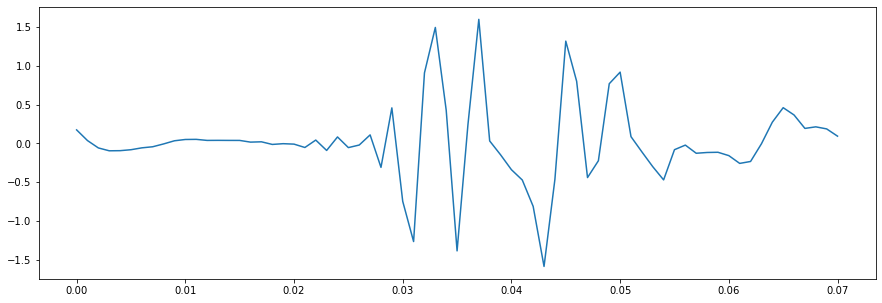

In [28]:
event = df141.iloc[1250]

starttime = obspy.UTCDateTime(event.parrival.replace(' ', 'T'))

data = day141.slice(starttime=starttime-0.02, endtime=starttime+0.05).filter(type='highpass', freq=50)

fig, ax = plt.subplots(figsize=(15, 5))

wf = data[event.first_hydrophone].data
ts = data[event.first_hydrophone].times()

ax.plot(ts, wf)

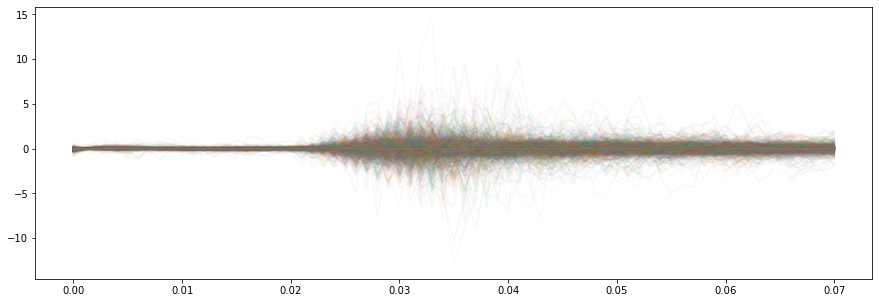

In [32]:
# event = df141.iloc[1250]

fig, ax = plt.subplots(figsize=(15, 5))

for i, event in df141.iterrows():

    starttime = obspy.UTCDateTime(event.parrival.replace(' ', 'T'))

    data = day141.slice(starttime=starttime-0.02, endtime=starttime+0.05).filter(type='highpass', freq=50)


    wf = data[event.first_hydrophone].data
    ts = data[event.first_hydrophone].times()

    ax.plot(ts, wf, alpha=0.05)